In [88]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [89]:
# load data
data = pd.read_csv('dataset/dataset.csv',index_col=False) 
data.fillna(0,inplace=True)


In [90]:
data.head(5)

,wu,wr,wd,wl,au,ar,ad,al,bu,br,bd,bl,direction
0,256,240,256,272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,240,240,272,272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,224,240,288,272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,208,240,304,272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,192,240,320,272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [91]:
data = data.reset_index(drop=True)

In [92]:
data.head(5)

,wu,wr,wd,wl,au,ar,ad,al,bu,br,bd,bl,direction
0,256,240,256,272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,240,240,272,272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,224,240,288,272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,208,240,304,272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,192,240,320,272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [93]:
X = data.iloc[:,:-1].astype(int).values # همه ردیف ها تا ستون اخر
Y = data.iloc[: ,-1].astype(int).values # همه ردیف ها فقط ستون اخرشون


In [94]:
X , Y

(array([[256, 240, 256, ...,   0,   0,   0],
        [240, 240, 272, ...,   0,   0,   0],
        [224, 240, 288, ...,   0,   0,   0],
        ...,
        [288, 272, 224, ...,   0,   0,   1],
        [288, 256, 224, ...,   0,   0,   1],
        [288, 240, 224, ...,   0,   0,   1]]),
 array([0, 0, 0, ..., 1, 1, 1]))

In [95]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12 , activation='sigmoid') , 
    tf.keras.layers.Dense(30,activation='relu') , 
    tf.keras.layers.Dense(16,activation='relu') , 
    tf.keras.layers.Dense(4 , activation='softmax')
])

In [96]:
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((16509, 12), (16509,), (4128, 12), (4128,))

In [97]:
model.compile(optimizer='adam' ,
              loss='sparse_categorical_crossentropy' , 
              metrics=['accuracy']
)


In [98]:
output = model.fit(X_train,Y_train,epochs=90)

Epoch 1/90


516/516 [==============================] - 10s 4ms/step - loss: 1.3735 - accuracy: 0.2990
Epoch 2/90
516/516 [==============================] - 2s 3ms/step - loss: 1.3607 - accuracy: 0.3229
Epoch 3/90
516/516 [==============================] - 2s 3ms/step - loss: 1.3551 - accuracy: 0.3260
Epoch 4/90
516/516 [==============================] - 2s 3ms/step - loss: 1.3505 - accuracy: 0.3172
Epoch 5/90
516/516 [==============================] - 2s 4ms/step - loss: 1.3388 - accuracy: 0.3332
Epoch 6/90
516/516 [==============================] - 2s 3ms/step - loss: 1.3327 - accuracy: 0.3349
Epoch 7/90
516/516 [==============================] - 2s 4ms/step - loss: 1.3273 - accuracy: 0.3362
Epoch 8/90
516/516 [==============================] - 2s 3ms/step - loss: 1.3239 - accuracy: 0.3361
Epoch 9/90
516/516 [==============================] - 2s 4ms/step - loss: 1.3191 - accuracy: 0.3427
Epoch 10/90
516/516 [==============================] - 2s 3ms/step - loss: 1.2811 - accuracy: 0.3576
Epoch 11/

In [99]:
loss , accuracy = model.evaluate(X_test,Y_test)

129/129 [==============================] - 1s 3ms/step - loss: 0.0455 - accuracy: 0.9823


In [100]:
model.save('weights/snake_game_model.h5')


c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


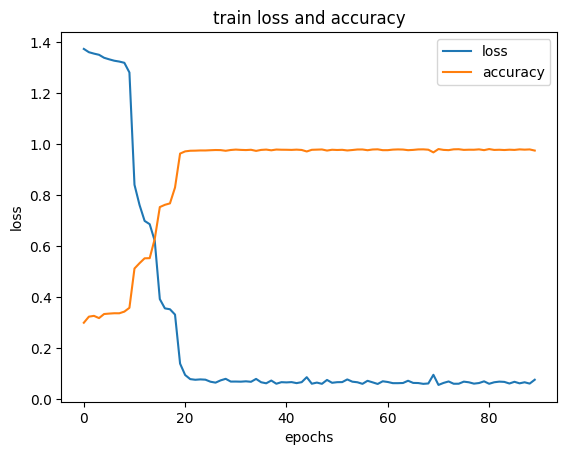

In [101]:

plt.plot(output.history["loss"], label='loss')
plt.plot(output.history["accuracy"], label='accuracy')
plt.title("train loss and accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()